In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## load data

In [4]:
# Import data
country_data = pd.read_csv("data/Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df_detail = pd.read_csv("data/data-dictionary.csv")
print(df_detail)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


## Get information 


In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
print("Number of countries: ", country_data['country'].value_counts().sum())

Number of countries:  167


In [9]:
country_num = country_data.drop('country', axis = 1)

## Visualization


In [10]:
sns.set_style('darkgrid')
sns.set_palette('Dark2')

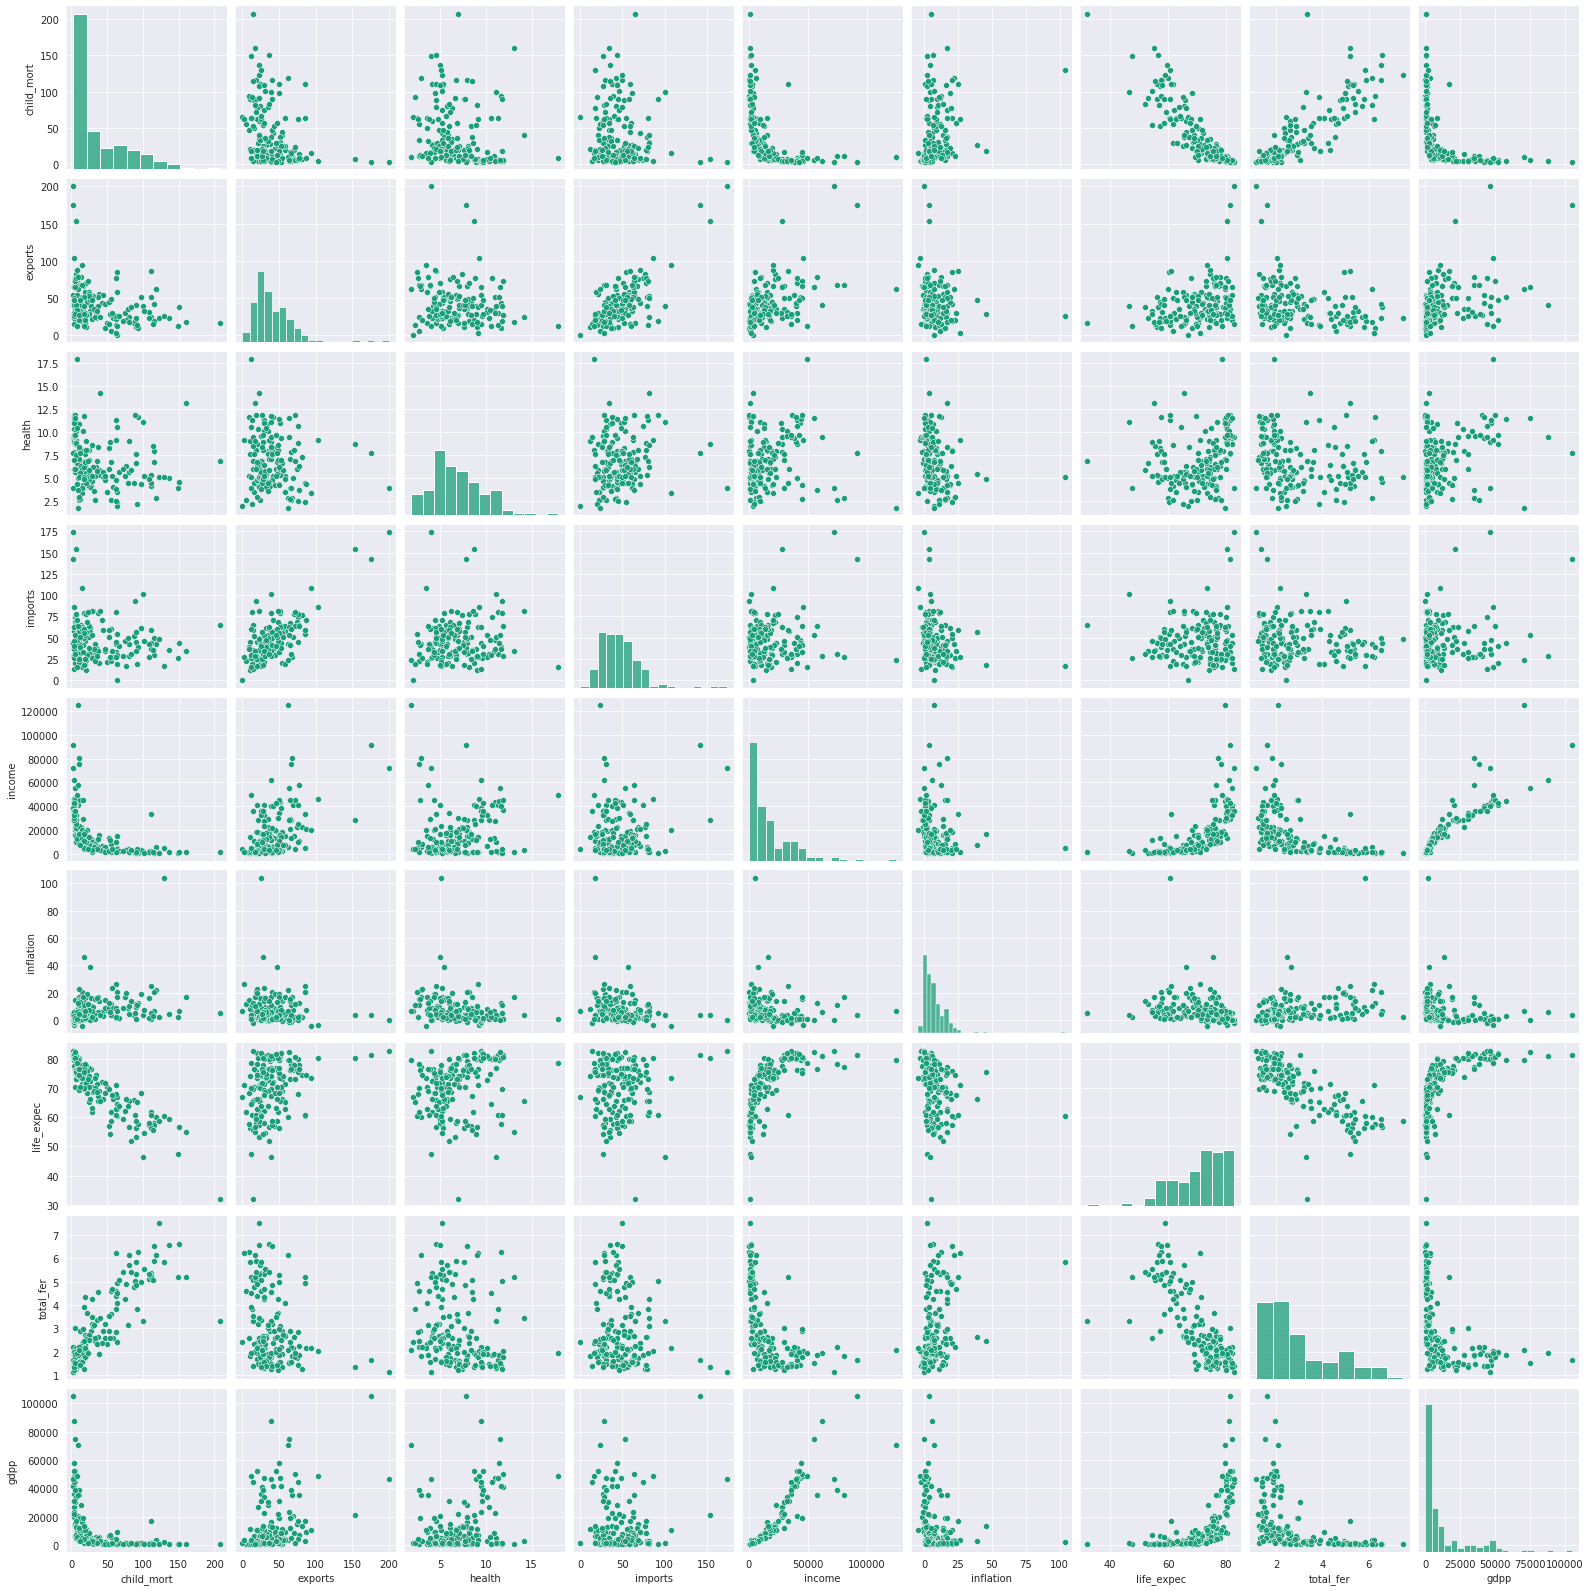

In [11]:
sns.pairplot(country_num)

<AxesSubplot:>

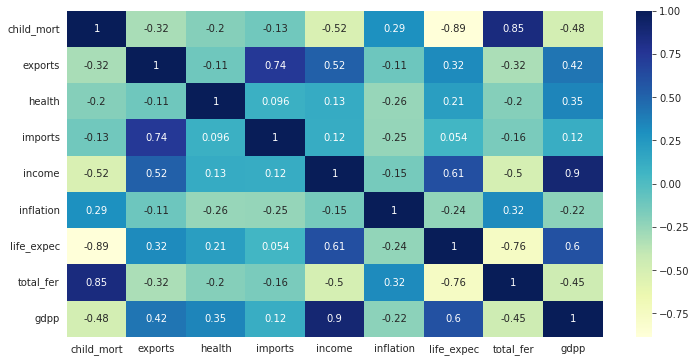

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(country_num.corr(), annot = True, cmap='YlGnBu')

Text(0.5, 1.0, 'gdpp')

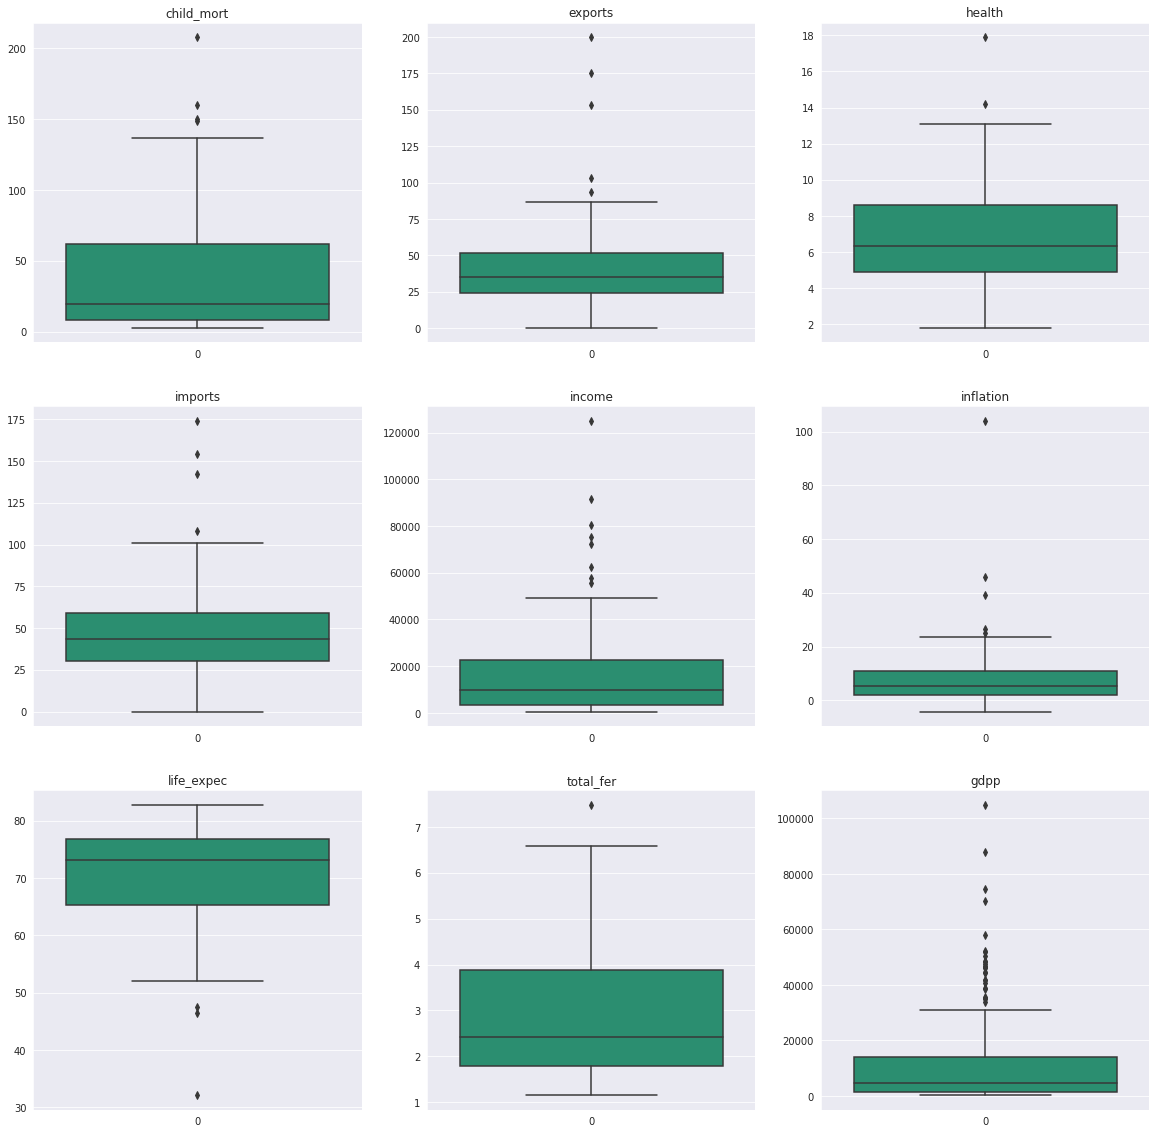

In [13]:
fig, axes = plt.subplots(3,3, figsize=(20, 20))

sns.boxplot(ax = axes[0, 0] ,data= country_num['child_mort'])
axes[0, 0].set_title('child_mort')
sns.boxplot(ax = axes[0, 1] ,data= country_num['exports'])
axes[0, 1].set_title('exports')
sns.boxplot(ax = axes[0, 2] ,data= country_num['health'])
axes[0, 2].set_title('health')
sns.boxplot(ax = axes[1, 0] ,data= country_num['imports'])
axes[1, 0].set_title('imports')
sns.boxplot(ax = axes[1, 1] ,data= country_num['income'])
axes[1, 1].set_title('income')
sns.boxplot(ax = axes[1, 2] ,data= country_num['inflation'])
axes[1, 2].set_title('inflation')
sns.boxplot(ax = axes[2, 0] ,data= country_num['life_expec'])
axes[2, 0].set_title('life_expec')
sns.boxplot(ax = axes[2, 1] ,data= country_num['total_fer'])
axes[2, 1].set_title('total_fer')
sns.boxplot(ax = axes[2, 2] ,data= country_num['gdpp'])
axes[2, 2].set_title('gdpp')


## Preprocessing


In [14]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_num = scaler.fit_transform(country_num)

## Clustering model

In [15]:
from sklearn.cluster import KMeans

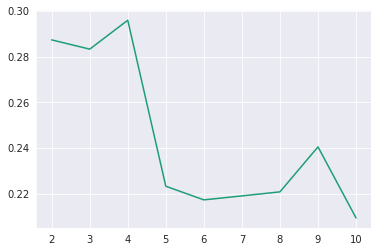

In [16]:
# Silhouette score
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_num)
    ss.append([k, silhouette_score(country_num, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

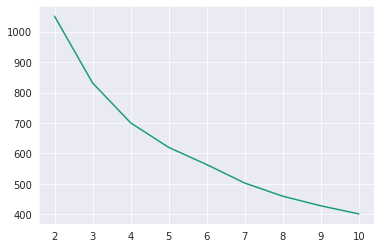

In [17]:
# Elbow curve
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_num)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

In [18]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(country_num)

KMeans(n_clusters=3, random_state=50)

In [20]:
label  = pd.Series(kmean.labels_)
label.head()

0    1
1    2
2    2
3    1
4    2
dtype: int32

In [21]:
label.value_counts()

2    84
1    47
0    36
dtype: int64